In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
import tensorflow as tf
from math import log
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import GlobalMaxPooling2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers, optimizers
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

print("Tensorflow version:",tf.__version__)
print("Keras version:",keras.__version__)


Tensorflow version: 2.8.2
Keras version: 2.8.0


In [7]:
from tensorflow.keras.datasets import cifar10
(xTrain, yTrain), (xTest, yTest) = cifar10.load_data()
xVal = xTrain[49000:, :].astype(np.float)
yVal = np.squeeze(yTrain[49000:, :])
xTrain = xTrain[:49000, :].astype(np.float)
yTrain = np.squeeze(yTrain[:49000, :])
yTest = np.squeeze(yTest)
xTest = xTest.astype(np.float)

In [8]:
#Choosing a smaller dataset
xTrain=xTrain[:3000,:]
yTrain=yTrain[:3000]
print(yTrain)
print(xTrain.shape)
print(yTrain.shape)

[6 9 9 ... 6 6 4]
(3000, 32, 32, 3)
(3000,)


In [9]:
xTrain = np.reshape(xTrain, (xTrain.shape[0], -1)) # The -1 means that the corresponding dimension is calculated from the other given dimensions.
xVal = np.reshape(xVal, (xVal.shape[0], -1))
xTest = np.reshape(xTest, (xTest.shape[0], -1))
print(xTrain.shape) 
print(xTrain[0])

#Normalize 
xTrain=((xTrain/255)*2)-1 
print(xTrain.shape)
print(xTrain[0])

(3000, 3072)
[ 59.  62.  63. ... 123.  92.  72.]
(3000, 3072)
[-0.5372549  -0.51372549 -0.50588235 ... -0.03529412 -0.27843137
 -0.43529412]


In [10]:
#SVM Linear Kernel
from sklearn import svm

def svm_linear(c):
    svc = svm.SVC(probability = False, kernel = 'linear', C = c)
    
    svc.fit(xTrain, yTrain) 
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_linear_train = svc.predict(xTrain)
    acc_train = np.mean(Yhat_svc_linear_train == yTrain)
    acc_train_svm_linear.append(acc_train)
    print('Train Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_linear_test = svc.predict(xVal)
    acc_test = np.mean(Yhat_svc_linear_test == yVal)
    acc_test_svm_linear.append(acc_test)
    print('Test Accuracy = {0:f}'.format(acc_test)) 
    

Train Accuracy = 0.354667
Test Accuracy = 0.098000
Train Accuracy = 0.484667
Test Accuracy = 0.188000
Train Accuracy = 0.709333
Test Accuracy = 0.253000
Train Accuracy = 0.989667
Test Accuracy = 0.286000
Train Accuracy = 1.000000
Test Accuracy = 0.279000
Train Accuracy = 1.000000
Test Accuracy = 0.279000
Train Accuracy = 1.000000
Test Accuracy = 0.279000


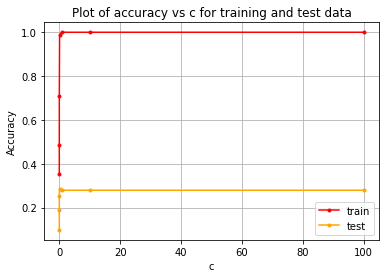

In [11]:
c_svm_linear = [0.0001,0.001,0.01,0.1,1,10,100]
acc_train_svm_linear = []
acc_test_svm_linear = []

for c in c_svm_linear:
    svm_linear(c)

plt.plot(c_svm_linear, acc_train_svm_linear,'.-',color='red')
plt.plot(c_svm_linear, acc_test_svm_linear,'.-',color='orange')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='lower right')
plt.title("Plot of accuracy vs c for training and test data")
plt.grid()

In [12]:
#SVM Polynomial Kernel

acc_train_svm_poly = []
acc_test_svm_poly = []

def svm_polynomial(c):

    svc_polynomial = svm.SVC(probability = False, kernel = 'poly', C = c)
    
    
    svc_polynomial.fit(xTrain, yTrain) 
    
    # Find the prediction and accuracy on the training set.
    Yhat_svc_polynomial_train = svc_polynomial.predict(xTrain)
    acc_train = np.mean(Yhat_svc_polynomial_train == yTrain)
    acc_train_svm_poly.append(acc_train)
    print('Accuracy = {0:f}'.format(acc_train))
    
    # Find the prediction and accuracy on the test set.
    Yhat_svc_polynomial_test = svc_polynomial.predict(xVal)
    acc_test = np.mean(Yhat_svc_polynomial_test == yVal)
    acc_test_svm_poly.append(acc_test)
    print('Accuracy = {0:f}'.format(acc_test))

Accuracy = 0.107333
Accuracy = 0.087000
Accuracy = 0.107333
Accuracy = 0.087000
Accuracy = 0.120667
Accuracy = 0.087000
Accuracy = 0.272333
Accuracy = 0.125000
Accuracy = 0.722000
Accuracy = 0.265000
Accuracy = 0.963667
Accuracy = 0.256000
Accuracy = 0.998667
Accuracy = 0.247000


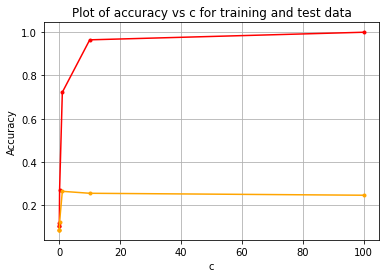

In [13]:
c_svm_poly = [0.0001,0.001,0.01,0.1,1,10,100]


for c in c_svm_poly:
    svm_polynomial(c)

plt.plot(c_svm_poly, acc_train_svm_poly,'.-',color='red')
plt.plot(c_svm_poly, acc_test_svm_poly,'.-',color='orange')
plt.xlabel('c')
plt.ylabel('Accuracy')
plt.title("Plot of accuracy vs c for training and test data")
plt.grid()

In [ ]:
#Try more values of c for polynomial kernel.
c_svm_poly_extended=[200,500,1000]
for c in c_svm_poly_extended:
    svm_polynomial(c)